## Model Testing on Test Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the test data
df_test = pd.read_csv("credit_test.csv")

In [ ]:
# Preprocess the test data
# Drop unnecessary columns
df_test.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

# Encode categorical features
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8,
    "September":9,
    "October":10,
    "November":11,
    "December":12}
df_test['Month'] = df_test['Month'].replace(month_mapping)
#df_test['Month'] = df_test['Month'].astype('int')


df_test.drop(df_test[df_test["Occupation"]=='_______'].index,inplace=True)
df_test.drop(df_test[df_test["Credit_Mix"]=='_'].index,inplace=True)


#df_test['Occupation'] = df_test['Occupation'].astype('int')
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15,
    'Scientist': 16
}
df_test['Occupation'] = df_test['Occupation'].replace(occupation_mapping)

#df_test['Credit_Mix'] = df_test['Credit_Mix'].astype('int')
credit_map={"Good":1,"Standard":2,"Bad":3}
df_test['Credit_Mix'] = df_test['Credit_Mix'].replace(credit_map)

df_test['Payment_Behaviour']= df_test['Payment_Behaviour'].replace("!@9#%8",np.nan)
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].replace(category_mapping)

pay_map={"Yes":1,"No":2,"NM":3}
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].replace(pay_map)



# Handle missing values
mean_salary = df_test["Monthly_Inhand_Salary"].mean()
df_test["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)
df_test["Num_of_Delayed_Payment"] = pd.to_numeric(df_test["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df_test["Num_of_Delayed_Payment"].mean()
df_test["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)
in_mean=df_test["Num_Credit_Inquiries"].mean()
df_test["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].str.extract(r'(\d+)')
df_test["Credit_History_Age"] = pd.to_numeric(df_test["Credit_History_Age"], errors="coerce")
credit_mean=df_test["Credit_History_Age"].mean()
df_test["Credit_History_Age"].fillna(credit_mean, inplace=True)
df_test["Amount_invested_monthly"] = pd.to_numeric(df_test["Amount_invested_monthly"], errors="coerce")
invest_mean=df_test["Amount_invested_monthly"].mean()
df_test["Amount_invested_monthly"].fillna(invest_mean, inplace=True)
df_test.dropna(subset=["Payment_Behaviour"], inplace=True)
df_test["Monthly_Balance"] = pd.to_numeric(df_test["Monthly_Balance"], errors="coerce")
month_mean=df_test["Monthly_Balance"].mean()
df_test["Monthly_Balance"].fillna(month_mean, inplace=True)


df_test["Annual_Income"] = pd.to_numeric(df_test["Annual_Income"], errors="coerce")
an_mean=df_test["Annual_Income"].mean()
df_test["Annual_Income"].fillna(an_mean, inplace=True)
df_test['Outstanding_Debt'] = pd.to_numeric(df_test['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df_test["Changed_Credit_Limit"] = pd.to_numeric(df_test["Changed_Credit_Limit"], errors="coerce")
c_mean=df_test["Changed_Credit_Limit"].mean()
df_test["Changed_Credit_Limit"].fillna(c_mean, inplace=True)
df_test['Age'] = df_test['Age'].replace('-500',np.nan)
df_test["Age"] = pd.to_numeric(df_test["Age"], errors="coerce")
age_mean=df_test["Age"].mean()
df_test["Age"].fillna(age_mean, inplace=True)
df_test["Num_of_Loan"] = pd.to_numeric(df_test["Num_of_Loan"], errors="coerce")
num_mean=df_test["Num_of_Loan"].mean()
df_test["Num_of_Loan"].fillna(num_mean, inplace=True)
df_test['Delay_from_due_date'] = df_test['Delay_from_due_date'].abs()


# Scale numerical features
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()
df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

# Separate features and target
X_test = df_test.copy()


In [ ]:
from lightgbm import LGBMClassifier
import joblib

# Load the trained LightGBM model
lgb_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    objective='multiclass',
    metric='multi_logloss'
)

In [ ]:
# Load the saved model from the specified path
model_path = '/content/lgb_model.pkl'
lgb_classifier = joblib.load(model_path)

In [ ]:
# Make predictions on the test set
predicted_credit_scores = lgb_classifier.predict(X_test)

In [ ]:
# Print the first 100 predicted credit scores in the form of an array
print("Predicted Credit Scores:")
print("[", end="")

for i in range(min(100, len(predicted_credit_scores))):
    if i > 0:
        print(", ", end="")
    print(predicted_credit_scores[i], end="")

    # Add line break after every 10 scores
    if (i + 1) % 10 == 0:
        print("\n", end="")

print("]")

Predicted Credit Scores:
[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0
, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0
, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0
, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0
, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0
, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0
, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0
, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0
, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0
, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0
]


In [ ]:
# Add the predicted credit scores to the test data
df_test["Credit_Score"] = predicted_credit_scores

# Save the updated test data to the same CSV file
df_test.to_csv("testing.csv", index=False)

print("Predicted Credit Scores added to test.csv")

Predicted Credit Scores added to test.csv


<ipython-input-12-7c0e9c128f74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predicted_credit_scores, data=df_test, palette="hot")


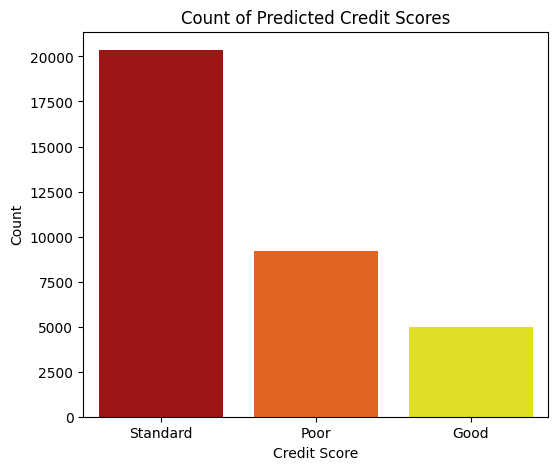

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot with custom x-tick labels
plt.figure(figsize=(6, 5))
sns.countplot(x=predicted_credit_scores, data=df_test, palette="hot")
plt.title('Count of Predicted Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Standard', 'Poor', 'Good'])

plt.show()